# 1. 라이브러리 로드

In [1]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_style('white')

In [3]:
import numpy as np
from scipy.io import loadmat
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import mglearn
import itertools
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# 2. 모델링 데이터 셋 생성

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/AI_application/mammography.csv')
# df = df.iloc[:,1:]
# df = df[['ever_married', 'gender', 'age', 'hypertension', 'heart_disease',
#        'avg_glucose_level', 'bmi','work_type_Govt_job',
#        'work_type_Never_worked', 'work_type_Private',
#        'work_type_Self-employed', 'work_type_children',
#        'smoking_status_formerly smoked', 'smoking_status_never smoked',
#        'smoking_status_smokes', 'stroke']]
df

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor,Cancer
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0
...,...,...,...,...,...,...,...
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,1
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,1
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,1
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,1


In [8]:
df[['Cancer']].value_counts()
#0 정상 #1 이상

Cancer
0         10923
1           260
dtype: int64

In [23]:
df_Cancer = df[df['Cancer']==1]
df_Cancer = df_Cancer.reset_index(drop=True)
df_No_Cancer = df[df['Cancer']==0]
df_No_Cancer = df_No_Cancer.reset_index(drop=True)

In [28]:
df_test = pd.concat([df_Cancer,df_No_Cancer[-260:]])
df_test = df_test.reset_index(drop=True)
df_test

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor,Cancer
0,-0.335889,-0.452501,-0.591631,0.817254,-0.377866,1.034896,1
1,4.592985,1.918550,-0.456387,2.264523,1.918840,0.702761,1
2,0.660252,-0.377300,-0.411305,1.708400,3.520855,1.400548,1
3,-0.321830,-0.452501,-0.276061,1.325275,13.750423,1.013566,1
4,-0.520347,-0.452501,-0.276061,3.001660,13.750423,0.702761,1
...,...,...,...,...,...,...,...
515,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0
516,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0
517,0.151934,-0.213626,-0.005571,0.423158,-0.377866,1.101932,0
518,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0


In [32]:
y_test = df_test[['Cancer']]
y_test

,Cancer
0,1
1,1
2,1
3,1
4,1
...,...
515,0
516,0
517,0
518,0


In [33]:
X_test = df_test.drop(df_test.columns[-1], axis = 1)
X_test

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor
0,-0.335889,-0.452501,-0.591631,0.817254,-0.377866,1.034896
1,4.592985,1.918550,-0.456387,2.264523,1.918840,0.702761
2,0.660252,-0.377300,-0.411305,1.708400,3.520855,1.400548
3,-0.321830,-0.452501,-0.276061,1.325275,13.750423,1.013566
4,-0.520347,-0.452501,-0.276061,3.001660,13.750423,0.702761
...,...,...,...,...,...,...
515,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723
516,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723
517,0.151934,-0.213626,-0.005571,0.423158,-0.377866,1.101932
518,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723


In [29]:
df_train = df_No_Cancer[:-260]
df_train

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor,Cancer
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0
...,...,...,...,...,...,...,...
10658,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0
10659,-0.100955,-0.394994,-0.005571,0.842149,0.920610,1.117167,0
10660,0.223752,-0.452501,-0.230979,0.829069,-0.377866,0.913011,0
10661,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0


In [30]:
df_train = df_train.drop(df.columns[-1], axis = 1)
df_train

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566
...,...,...,...,...,...,...
10658,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723
10659,-0.100955,-0.394994,-0.005571,0.842149,0.920610,1.117167
10660,0.223752,-0.452501,-0.230979,0.829069,-0.377866,0.913011
10661,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723


# 3. 모델 구축

##3-1. isolation forest

In [34]:
# Create and fit the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)  # You can adjust the contamination parameter
clf.fit(df_train)

# Predict anomalies on the test set
y_pred = clf.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([ 1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1,  1

In [35]:
# Anomalies are labeled as -1, normal points as 1
# You can convert this to binary 0/1 labels for classification purposes
y_pred_binary = [0 if p == 1 else 1 for p in y_pred]

In [36]:
y_test.value_counts()

Cancer
0         260
1         260
dtype: int64

In [37]:
# Evaluate the model's performance
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       260
           1       0.91      0.49      0.64       260

    accuracy                           0.72       520
   macro avg       0.78      0.72      0.70       520
weighted avg       0.78      0.72      0.70       520



Text(0.5, 23.52222222222222, 'Predicted')

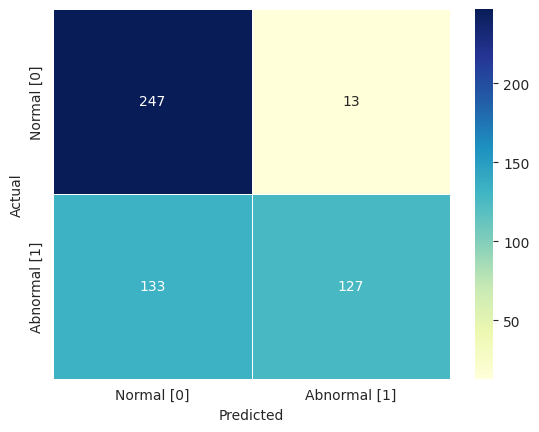

In [38]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [39]:
f1 = f1_score(y_pred_binary,y_test)
print(f1)

0.635


## 3-2. One class SVM

In [40]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(X_test)

In [41]:
# Create and fit the One-Class SVM model
clf = OneClassSVM(kernel="rbf", nu=0.05)  # You can adjust the 'nu' parameter
clf.fit(df_train)

# Predict anomalies on the test set
y_pred = clf.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


array([ 1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1,  1

In [42]:
# Anomalies are labeled as -1, normal points as 1
# You can convert this to binary 0/1 labels for classification purposes
y_pred_binary = [0 if p == 1 else 1 for p in y_pred]

# Evaluate the model's performance
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.68      0.60      0.63       260
           1       0.64      0.72      0.68       260

    accuracy                           0.66       520
   macro avg       0.66      0.66      0.65       520
weighted avg       0.66      0.66      0.65       520



Text(0.5, 23.52222222222222, 'Predicted')

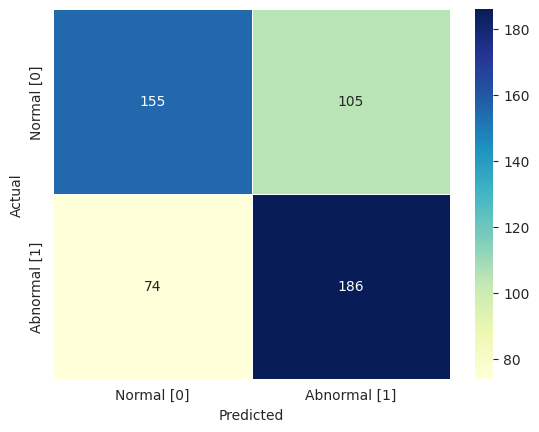

In [43]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [44]:
f1 = f1_score(y_pred_binary,y_test)
print(f1)

0.6751361161524501


## 3-3. Auto Encoder

In [45]:
from keras.layers import Input, Dense
from keras.models import Model

In [46]:
# Define and train the autoencoder model
input_dim = df_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(df_train, df_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the trained autoencoder to reconstruct the data
reconstructed_data = autoencoder.predict(X_test)
reconstructed_data

Epoch 1/50
334/334 [==============================] - 1s 2ms/step - loss: 0.3068 - val_loss: 0.9736
Epoch 2/50
334/334 [==============================] - 1s 3ms/step - loss: 0.0233 - val_loss: 0.2912
Epoch 3/50
334/334 [==============================] - 1s 3ms/step - loss: 0.0084 - val_loss: 0.1409
Epoch 4/50
334/334 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0857
Epoch 5/50
334/334 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0572
Epoch 6/50
334/334 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0450
Epoch 7/50
334/334 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0354
Epoch 8/50
334/334 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0311
Epoch 9/50
334/334 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0270
Epoch 10/50
334/334 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0257

array([[-0.3272233 , -0.45291454, -0.59357375,  0.8987657 , -0.42374   ,
         1.067415  ],
       [ 4.7496557 ,  1.8519558 , -0.44415152,  2.4495423 ,  2.7807217 ,
         0.7244055 ],
       [ 0.69693065, -0.37972546, -0.4093877 ,  1.8562684 ,  5.0519958 ,
         1.4108175 ],
       ...,
       [ 0.17288081, -0.21672067, -0.01449925,  0.48490384, -0.4265952 ,
         1.1355511 ],
       [-0.78684974, -0.4658875 , -0.5866432 , -0.8630334 , -0.38645196,
        -0.943473  ],
       [ 0.20547758,  0.93647814,  0.07401782,  0.9213904 , -0.41952997,
         0.56610906]], dtype=float32)

In [47]:
# Calculate the reconstruction error for each data point
reconstruction_errors = np.mean(np.square(X_test - reconstructed_data), axis=1)

# Set a threshold for anomaly detection (e.g., 2 times the mean error)
threshold = 2 * np.mean(reconstruction_errors)

# Identify anomalies based on the threshold
anomalies = reconstruction_errors > threshold

# Print or further analyze the anomalies
print("Number of anomalies:", np.sum(anomalies))

Number of anomalies: 19


In [48]:
y_pred_binary = [0 if p == False else 1 for p in (anomalies)]
y_pred_binary

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [49]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       260
           1       1.00      0.07      0.14       260

    accuracy                           0.54       520
   macro avg       0.76      0.54      0.41       520
weighted avg       0.76      0.54      0.41       520



Text(0.5, 23.52222222222222, 'Predicted')

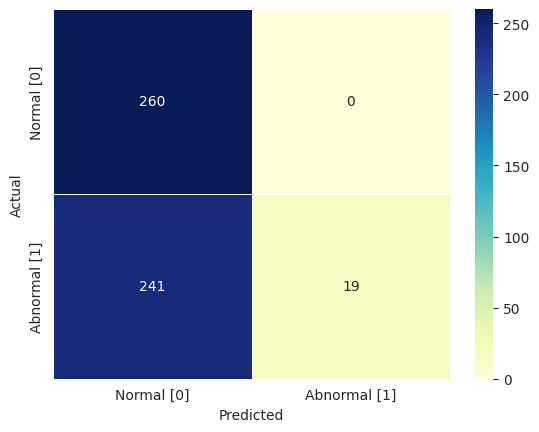

In [50]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [51]:
f1 = f1_score(y_test,y_pred_binary)
print(f1)

0.13620071684587814


##3-4. LOF

In [52]:
lof = LocalOutlierFactor(novelty=True)  # novelty=True indicates that LOF will be used for anomaly detection
lof.fit(df_train)

# Predict anomalies on the data
y_pred = lof.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1,  1

In [53]:
# Anomalies are labeled as -1, normal points as 1
# You can convert this to binary 0/1 labels for classification purposes
y_pred_binary = [0 if p == 1 else 1 for p in y_pred]

# Evaluate the model's performance
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       260
           1       0.59      0.51      0.54       260

    accuracy                           0.57       520
   macro avg       0.58      0.57      0.57       520
weighted avg       0.58      0.57      0.57       520



Text(0.5, 23.52222222222222, 'Predicted')

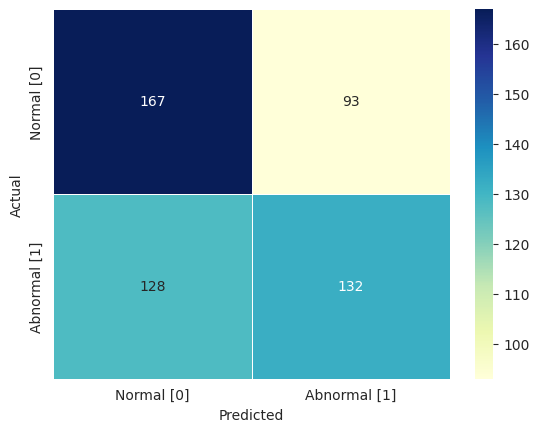

In [54]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [55]:
#LOF
f1 = f1_score(y_test,y_pred_binary)
print(f1)

0.5443298969072164
